# Correlação e regressão

## Importações

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import math

## Base de dados

In [ ]:
tamanho = np.array([30, 39, 49, 60])
preco = np.array([57000, 69000, 77000, 90000])

In [ ]:
dataset = pd.DataFrame({'tamanho': tamanho, 'preco': preco})
dataset

,tamanho,preco
0,30,57000
1,39,69000
2,49,77000
3,60,90000


In [ ]:
media_tamanho = dataset['tamanho'].mean()
media_preco = dataset['preco'].mean()
media_tamanho, media_preco

(44.5, 73250.0)

In [ ]:
dp_tamanho = dataset['tamanho'].std()
dp_preco = dataset['preco'].std()
dp_tamanho, dp_preco

(12.922847983320086, 13865.424623862047)

## Correlação - cálculo manual

In [ ]:
dataset['dif'] = (dataset['tamanho'] - media_tamanho) * (dataset['preco'] - media_preco)
dataset

,tamanho,preco,dif
0,30,57000,235625.0
1,39,69000,23375.0
2,49,77000,16875.0
3,60,90000,259625.0


In [ ]:
soma_dif = dataset['dif'].sum()
soma_dif

535500.0

In [ ]:
covariancia = soma_dif / (len(dataset) - 1)
covariancia

178500.0

In [ ]:
coeficiente_correlacao = covariancia / (dp_tamanho * dp_preco)
coeficiente_correlacao

0.9962006267707775

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


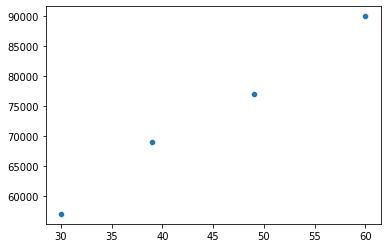

In [ ]:
sns.scatterplot(tamanho, preco);

In [ ]:
coeficiente_determinacao = math.pow(coeficiente_correlacao, 2)
coeficiente_determinacao

0.9924156887784898

## Correlação - cálculo com numpy a pandas

In [ ]:
np.cov(tamanho, preco)

array([[1.6700e+02, 1.7850e+05],
       [1.7850e+05, 1.9225e+08]])

In [ ]:
dataset.cov()

,tamanho,preco,dif
tamanho,167.0,178500.0,1.850000e+05
preco,178500.0,192250000.0,1.612500e+08
dif,185000.0,161250000.0,1.735512e+10


In [ ]:
np.corrcoef(tamanho, preco)

array([[1.        , 0.99620063],
       [0.99620063, 1.        ]])

In [ ]:
dataset.corr()

,tamanho,preco,dif
tamanho,1.000000,0.996201,0.108667
preco,0.996201,1.000000,0.088278
dif,0.108667,0.088278,1.000000


## Exercício - correlação base de dados preço das casas

In [ ]:
dataset = pd.read_csv('house_prices.csv')
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
dataset.drop(labels = ['id', 'date', 'sqft_living', 'sqft_lot'], axis = 1, inplace=True)
dataset.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
dataset.corr()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
floors,0.256794,0.175429,0.500653,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248
sqft_above,0.605567,0.477600,0.685342,0.523885,0.072075,0.167649,-0.158214,0.755923,1.000000,-0.051943,0.423898,0.023285,-0.261190,-0.000816,0.343803,0.731870,0.194050
sqft_basement,0.323816,0.303093,0.283770,-0.245705,0.080588,0.276947,0.174105,0.168392,-0.051943,1.000000,-0.133124,0.071323,0.074845,0.110538,-0.144765,0.200355,0.017276


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


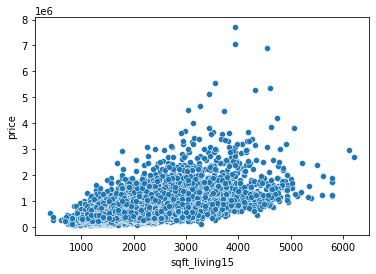

In [ ]:
sns.scatterplot(dataset['sqft_living15'], dataset['price']);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


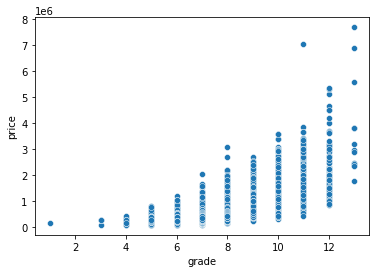

In [ ]:
sns.scatterplot(dataset['grade'], dataset['price']);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


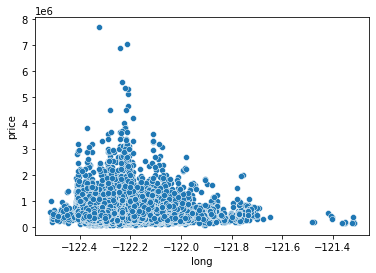

In [ ]:
sns.scatterplot(dataset['long'], dataset['price']);

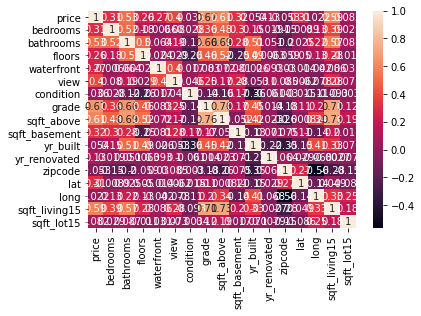

In [ ]:
sns.heatmap(dataset.corr(), annot=True);

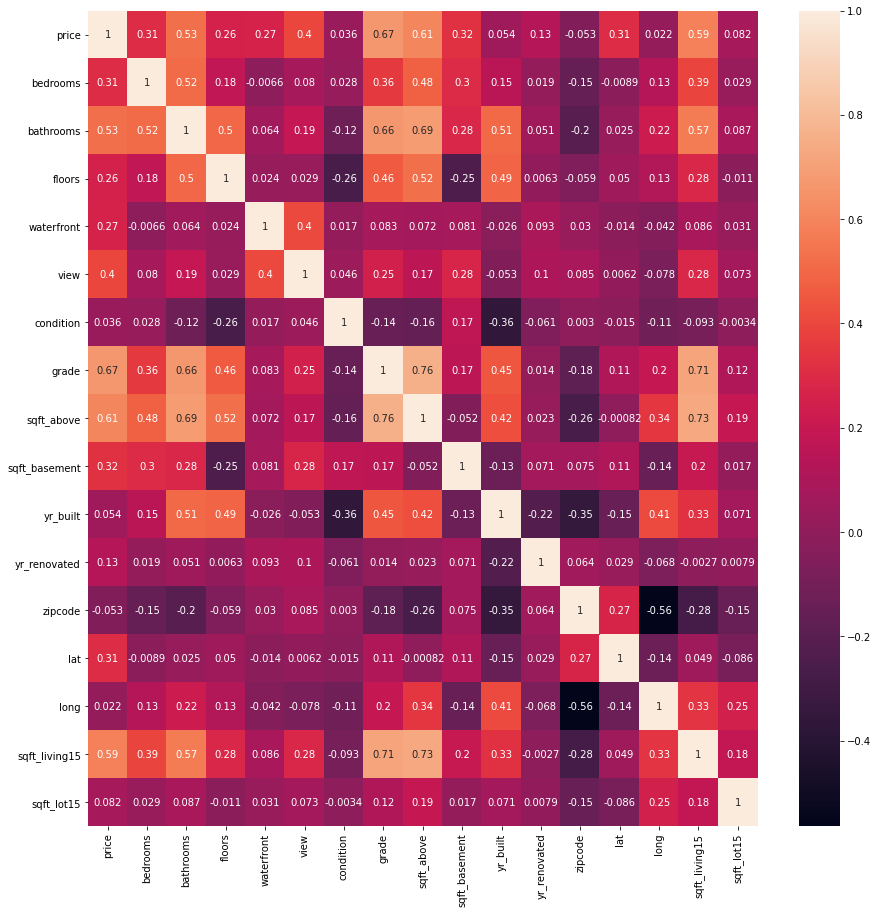

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(dataset.corr(), annot=True)

## Correlação com a biblioteca Yellowbrick

- https://www.scikit-yb.org/en/latest/

In [ ]:
!pip install yellowbrick --upgrade

     |████████████████████████████████| 266kB 2.8MB/s 
  Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1


In [ ]:
from yellowbrick.target import FeatureCorrelation

In [ ]:
dataset.columns[1:]

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


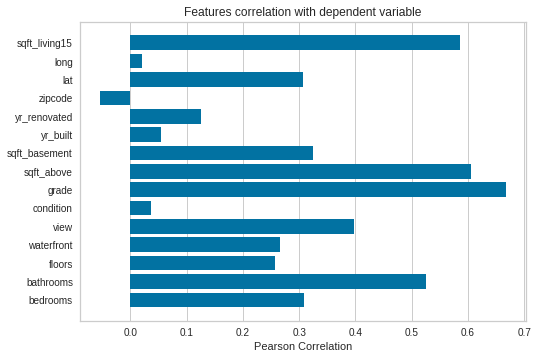

In [ ]:
grafico = FeatureCorrelation(labels = dataset.columns[1:])
grafico.fit(dataset.iloc[:, 1:16].values, dataset.iloc[:, 0].values)
grafico.show();

## Regressão

- Correlação: relacionamento entre variáveis, uma variável afeta a outra. Duas vias: correlação de price x sqft_living = correlação sqft_living x price
- Regressão é uma via: sqft_living para prever o preço é diferente de utilizar o preço para prever sqft_living
- Espera-se que a correlação seja de moderada a forte para obter um bom modelo (positiva ou negativa)
- Coeficiente de determinação (R2): > 0.7 é um bom valor. Entre 0 e 0.3 é ruim. Entre esses valores é interessante fazer testes
- Regressão linear: existir lineariedade

In [ ]:
dataset = pd.read_csv('house_prices.csv')
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
dataset.drop(labels = ['id', 'date'], axis = 1, inplace=True)
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


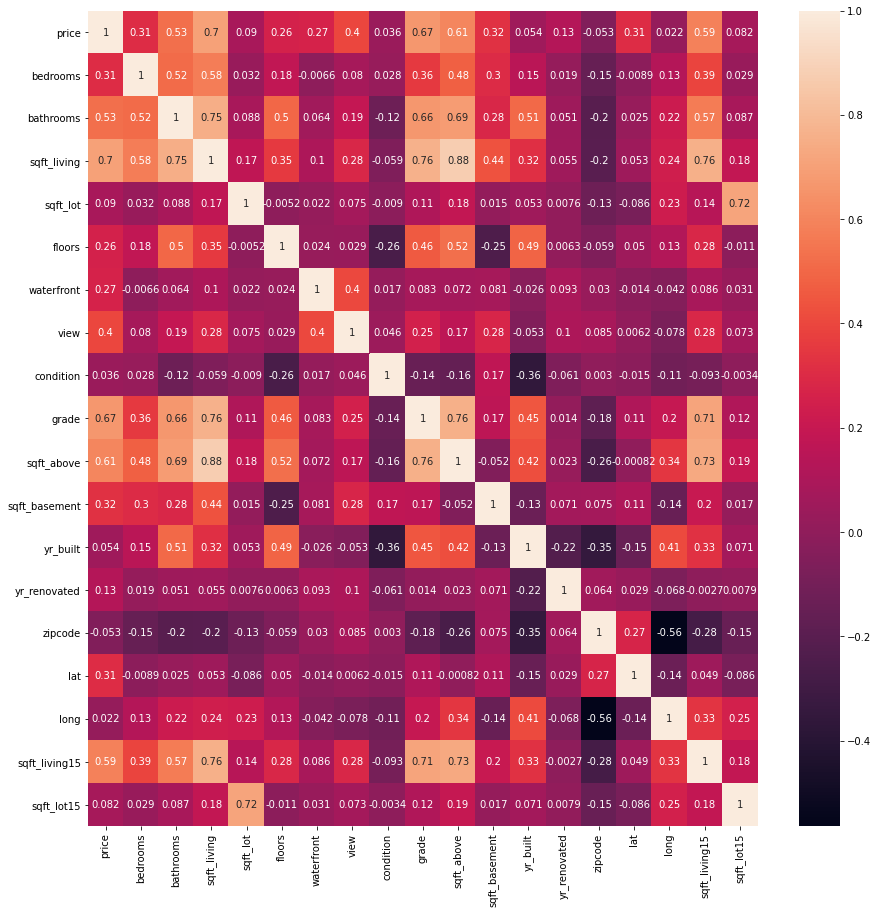

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(dataset.corr(), annot=True)

In [ ]:
math.pow(0.7, 2)

0.48999999999999994

### Regressão linear simples

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
X = dataset['sqft_living'].values
X.shape

(21613,)

In [ ]:
X = X.reshape(-1, 1)
X.shape

(21613, 1)

In [ ]:
y = dataset['price'].values
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [ ]:
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_treinamento.shape, X_teste.shape

((17290, 1), (4323, 1))

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_treinamento, y_treinamento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# b0
regressor.intercept_

-30186.361061054864

In [ ]:
# b1
regressor.coef_

array([273.82181112])

In [ ]:
regressor.intercept_ + regressor.coef_ * 900

array([216253.26894848])

In [ ]:
regressor.predict(np.array([[900]]))

array([216253.26894848])

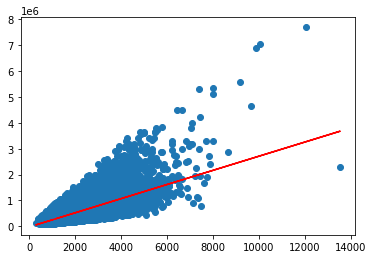

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, regressor.predict(X), color = 'red')

In [ ]:
regressor.score(X_treinamento, y_treinamento)

0.4887607821388749

In [ ]:
regressor.score(X_teste, y_teste)

0.5033019006466926

### Métricas de erros

In [ ]:
previsoes = regressor.predict(X_teste)

In [ ]:
previsoes, y_teste

(array([ 733776.4919685 ,  416143.19106732,  618771.33129738, ...,
         449001.80840193, 1412854.58355033,  380546.3556215 ]),
 array([ 459000.,  445000., 1057000., ...,  260000., 1795000.,  418000.]))

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mean_absolute_error(y_teste, previsoes)

178578.01159005202

In [ ]:
mean_squared_error(y_teste, previsoes)

85730574276.16481

In [ ]:
math.sqrt(mean_squared_error(y_teste, previsoes))

292797.8385783693

### Regressão linear múltipla

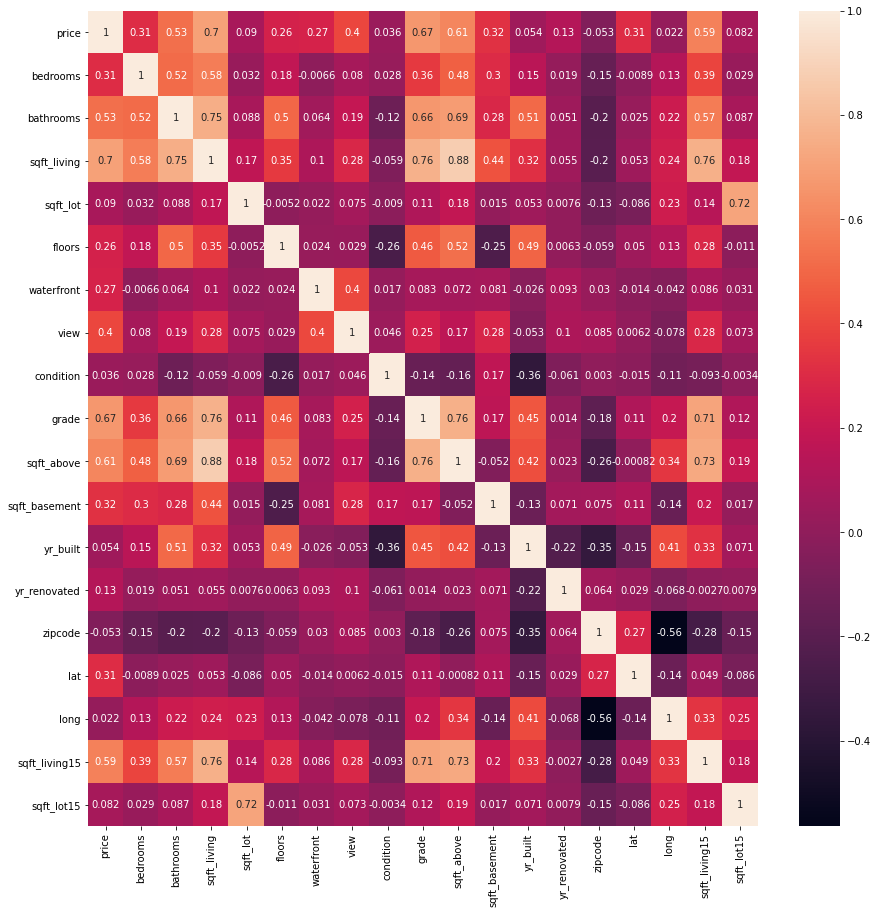

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(dataset.corr(), annot=True)

In [ ]:
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
X = dataset.iloc[:, [2, 3, 9, 10]].values
X

array([[1.00e+00, 1.18e+03, 7.00e+00, 1.18e+03],
       [2.25e+00, 2.57e+03, 7.00e+00, 2.17e+03],
       [1.00e+00, 7.70e+02, 6.00e+00, 7.70e+02],
       ...,
       [7.50e-01, 1.02e+03, 7.00e+00, 1.02e+03],
       [2.50e+00, 1.60e+03, 8.00e+00, 1.60e+03],
       [7.50e-01, 1.02e+03, 7.00e+00, 1.02e+03]])

In [ ]:
y = dataset.iloc[:, 0].values
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

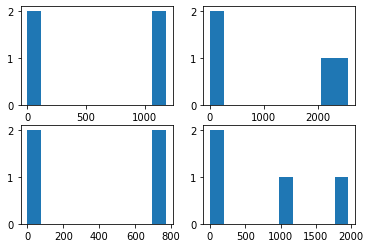

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(2, 2)
ax[0, 0].hist(X[0])
ax[0, 1].hist(X[1])
ax[1, 0].hist(X[2])
ax[1, 1].hist(X[3]);

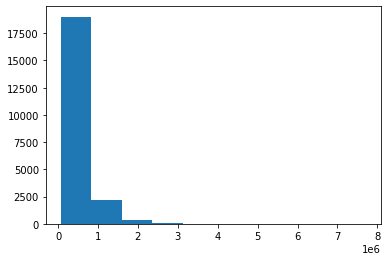

In [ ]:
plt.hist(y);

In [ ]:
y = np.log(y)

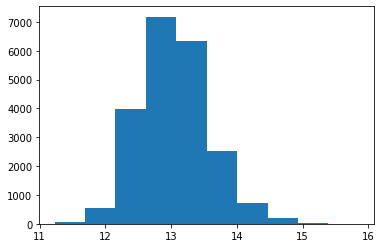

In [ ]:
plt.hist(y);

In [ ]:
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_treinamento.shape, X_teste.shape

((17290, 4), (4323, 4))

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_treinamento, y_treinamento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regressor.score(X_treinamento, y_treinamento)

0.559462085496587

In [ ]:
regressor.score(X_teste, y_teste)

0.583736323335128

In [ ]:
previsoes = regressor.predict(X_teste)
mean_absolute_error(y_teste, previsoes)

163331.28566448082

## Exercício

In [ ]:
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
dataset.drop(labels = ['sqft_living15', 'sqft_lot15'], axis = 1, inplace=True)
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


In [ ]:
X = dataset.iloc[:, 1:17].values
y = dataset.iloc[:, 0].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 1)
regressor = LinearRegression()
regressor.fit(X_treinamento, y_treinamento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regressor.score(X_treinamento, y_treinamento)

0.7028464225751405

In [ ]:
regressor.score(X_teste, y_teste)

0.6849876187393011

### Seleção de atributos

- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFdr.html

In [ ]:
from sklearn.feature_selection import SelectFdr, f_regression
selecao = SelectFdr(f_regression, alpha = 0.0)
X_novo = selecao.fit_transform(X, y)
X.shape, X_novo.shape

((21613, 16), (21613, 9))

In [ ]:
selecao.pvalues_

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 7.97250451e-040,
       1.58101007e-322, 0.00000000e+000, 0.00000000e+000, 8.93565406e-008,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.92987281e-015,
       1.02134789e-077, 5.01105043e-015, 0.00000000e+000, 1.47509222e-003])

In [ ]:
colunas = selecao.get_support()
colunas

array([ True,  True,  True, False, False,  True,  True, False,  True,
        True,  True, False, False, False,  True, False])

In [ ]:
dataset.columns[1:17]

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'],
      dtype='object')

In [ ]:
dataset.columns[1:17][colunas == True]

Index(['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view', 'grade',
       'sqft_above', 'sqft_basement', 'lat'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X_novo, y, test_size = 0.2, random_state = 1)
regressor = LinearRegression()
regressor.fit(X_treinamento, y_treinamento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regressor.score(X_treinamento, y_treinamento)

0.6600844333469127

In [ ]:
regressor.score(X_teste, y_teste)

0.6443733684297862